# Frame the problem : The goal is to analyse and understand the relationship between  different features and how these features will be leveraged to predict the price of a house.

In [1]:
#Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get the Data
# - Quick look at the Data

In [2]:
df = pd.read_excel("/kaggle/input/housing-pricess/DS - Assignment Part 1 data set.xlsx")

In [3]:
df.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [4]:
#Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Transaction date                          414 non-null    float64
 1   House Age                                 414 non-null    float64
 2   Distance from nearest Metro station (km)  414 non-null    float64
 3   Number of convenience stores              414 non-null    int64  
 4   latitude                                  414 non-null    float64
 5   longitude                                 414 non-null    float64
 6   Number of bedrooms                        414 non-null    int64  
 7   House size (sqft)                         414 non-null    int64  
 8   House price of unit area                  414 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 29.2 KB


In [5]:
# Summary Stats
df.describe()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


In [6]:
#Checking null values
df.isnull().sum()

Transaction date                            0
House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64

# DATA EXPLORATION
- Data Visualization
- Looking for Correlations
- Experimenting with Attribute Combinations

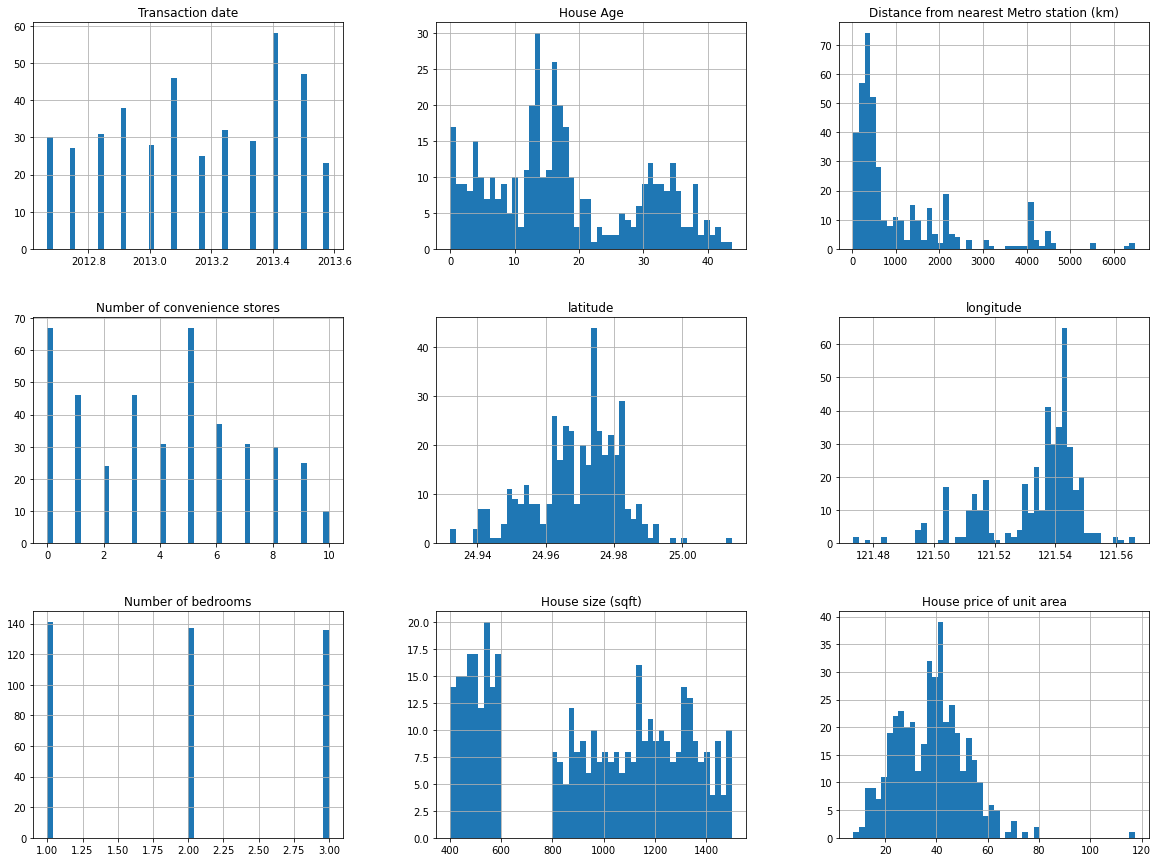

In [7]:
# A histogram shows the number of instances (on the vertical axis) that have a given value range(on the horizontal axis)
%matplotlib inline
df.hist(bins = 50, figsize = (20, 15))
plt.show()

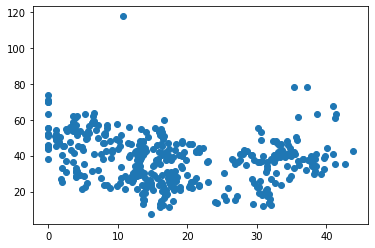

In [8]:

x = df['House Age']
y = df['House price of unit area']
plt.scatter(x , y )
plt.show()

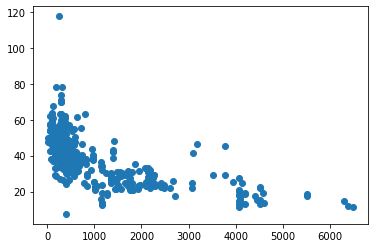

In [9]:
x = df['Distance from nearest Metro station (km)']
y = df['House price of unit area']
plt.scatter(x , y )
plt.show()

We will keep this column as you can see it really effects the house price.

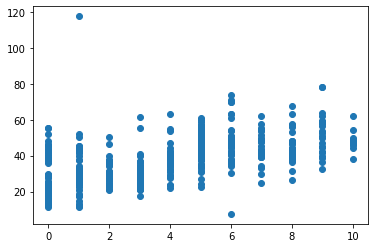

In [10]:
x = df['Number of convenience stores']
y = df['House price of unit area']
plt.scatter(x , y )
plt.show()

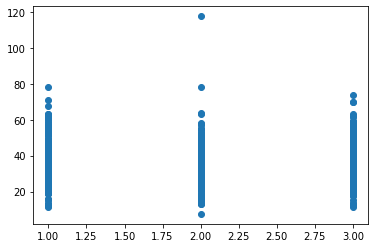

In [11]:
x = df['Number of bedrooms']
y = df['House price of unit area']
plt.scatter(x , y )
plt.show()

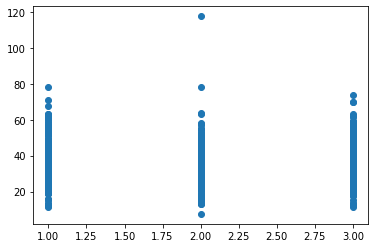

In [12]:
x = df['Number of bedrooms']
y = df['House price of unit area']
plt.scatter(x , y, label = 'label')
plt.show()

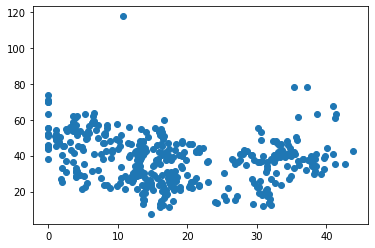

In [13]:
x = df['House Age']
y = df['House price of unit area']
plt.scatter(x , y, label = 'label')
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='House price of unit area'>

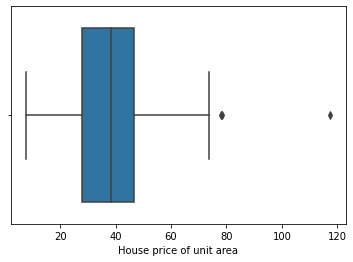

In [14]:
sns.boxplot(df['House price of unit area'])

In [15]:
#Merging House Size and House price of unit area
df['Sale Price'] = df['House size (sqft)'] * df['House price of unit area']

In [16]:
df = df.drop(['House size (sqft)', 'House price of unit area'], axis = 1)

# Correlation of house price with all the values
# 

Text(0.5, 1.0, 'Numeric Feature heatmap')

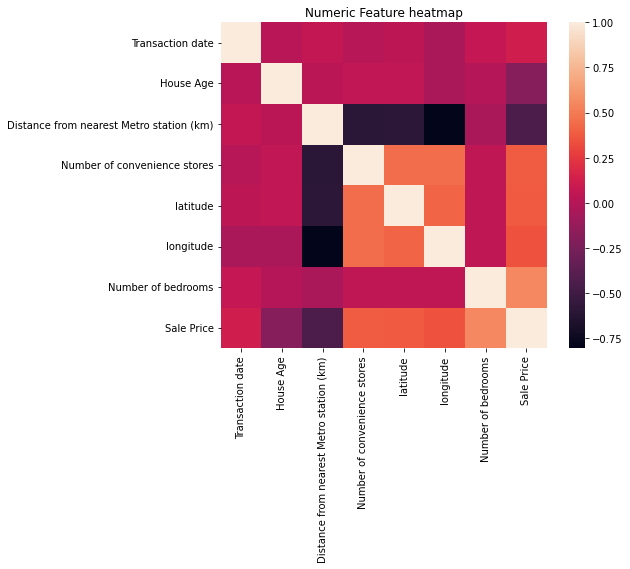

In [17]:
fig,ax = plt.subplots(figsize=(8,6))
correlation = df.select_dtypes(include=['float64','int64']).iloc[:,].corr()
sns.heatmap(correlation,ax=ax,vmax=1,square=True)
plt.title('Numeric Feature heatmap')

In [18]:
corr_dict = correlation['Sale Price'].to_dict()

## descending 
## correlation with price
for key,val in sorted(corr_dict.items(),key=lambda x:-abs(x[1])):
    print('{0} \t : {1}' .format(key,val))

Sale Price 	 : 1.0
Number of bedrooms 	 : 0.5486785373646094
Distance from nearest Metro station (km) 	 : -0.4410935138669291
Number of convenience stores 	 : 0.38116914737069063
latitude 	 : 0.3784402828483719
longitude 	 : 0.3465379271235023
House Age 	 : -0.1987405716701952
Transaction date 	 : 0.11905851388931486


In [19]:
df

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,Sale Price
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,21792.5
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,52328.0
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,50138.0
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,47950.0
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,21162.1
...,...,...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381,3,12366.2
410,2012.666667,5.6,90.45606,9,24.97433,121.54310,2,63900.0
411,2013.250000,18.8,390.96960,7,24.97923,121.53986,1,20421.8
412,2013.000000,8.1,104.81010,5,24.96674,121.54067,1,31342.5


# Prepare Data for Machine Learning
- Data Cleaning
- Feature Selection
- Feature Scaling

In [20]:
#Deleting the outlier
from scipy import stats

def drop_numerical_outliers(df, z_thresh=3):
    # Constrains will contain `True` or `False` depending on if it is a value below the threshold.
    constrains = df.select_dtypes(include=[np.number]) \
        .apply(lambda x: np.abs(stats.zscore(x)) < z_thresh, reduce=False) \
        .all(axis=1)
    # Drop (inplace) values set to be rejected
    df.drop(df.index[~constrains], inplace=True)

# Deleting the columns that are irrelevant to the business objective

In [21]:
df = df.drop(['Transaction date' ], axis = 1)

In [22]:
df

,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,Sale Price
0,32.0,84.87882,10,24.98298,121.54024,1,21792.5
1,19.5,306.59470,9,24.98034,121.53951,2,52328.0
2,13.3,561.98450,5,24.98746,121.54391,3,50138.0
3,13.3,561.98450,5,24.98746,121.54391,2,47950.0
4,5.0,390.56840,5,24.97937,121.54245,1,21162.1
...,...,...,...,...,...,...,...
409,13.7,4082.01500,0,24.94155,121.50381,3,12366.2
410,5.6,90.45606,9,24.97433,121.54310,2,63900.0
411,18.8,390.96960,7,24.97923,121.53986,1,20421.8
412,8.1,104.81010,5,24.96674,121.54067,1,31342.5


**Merging two features to make one feature that is Sale Price
This will reduce the number of dimensions without losing any information of the dataset
It is also refered as dimensionality reduction**

In [23]:
#Merging House Size and House price of unit area
#df['Sale Price'] = df['House size (sqft)'] * df['House price of unit area']

In [24]:
df

,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,Sale Price
0,32.0,84.87882,10,24.98298,121.54024,1,21792.5
1,19.5,306.59470,9,24.98034,121.53951,2,52328.0
2,13.3,561.98450,5,24.98746,121.54391,3,50138.0
3,13.3,561.98450,5,24.98746,121.54391,2,47950.0
4,5.0,390.56840,5,24.97937,121.54245,1,21162.1
...,...,...,...,...,...,...,...
409,13.7,4082.01500,0,24.94155,121.50381,3,12366.2
410,5.6,90.45606,9,24.97433,121.54310,2,63900.0
411,18.8,390.96960,7,24.97923,121.53986,1,20421.8
412,8.1,104.81010,5,24.96674,121.54067,1,31342.5


# Our final dataframe for modeling

In [25]:
df_final = df

In [26]:
df_final.head()

,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,Sale Price
0,32.0,84.87882,10,24.98298,121.54024,1,21792.5
1,19.5,306.59470,9,24.98034,121.53951,2,52328.0
2,13.3,561.98450,5,24.98746,121.54391,3,50138.0
3,13.3,561.98450,5,24.98746,121.54391,2,47950.0
4,5.0,390.56840,5,24.97937,121.54245,1,21162.1


In [27]:
df_final.describe()

,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,Sale Price
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,35597.804106
std,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,19890.892075
min,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,5440.400000
25%,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,20482.700000
50%,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,31224.200000
75%,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,48439.375000
max,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,161327.500000


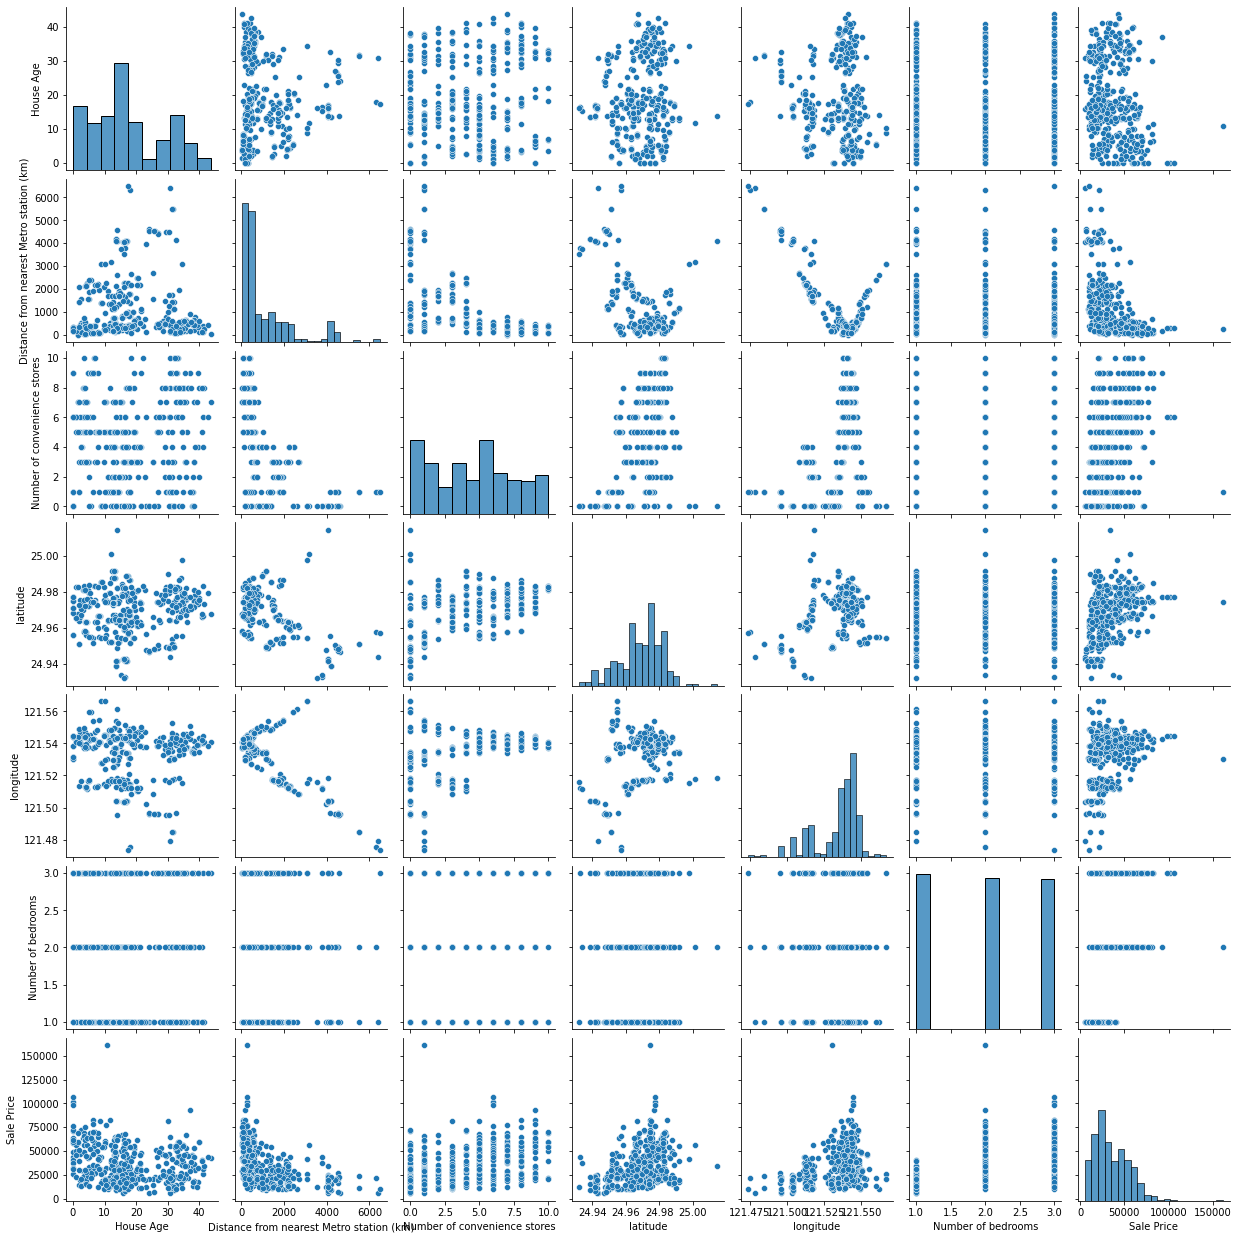

In [28]:
sns.pairplot(df_final)

In [29]:
df_final.shape

(414, 7)

In [30]:
df_final.head()

,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,Sale Price
0,32.0,84.87882,10,24.98298,121.54024,1,21792.5
1,19.5,306.59470,9,24.98034,121.53951,2,52328.0
2,13.3,561.98450,5,24.98746,121.54391,3,50138.0
3,13.3,561.98450,5,24.98746,121.54391,2,47950.0
4,5.0,390.56840,5,24.97937,121.54245,1,21162.1


# 1. Build machine learning models
# 2. Get cross validation scores of the models
# 3. Stack up the models

In [31]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, mean_squared_log_error, r2_score
from sklearn import model_selection
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV


In [32]:
x = df_final.drop(['Sale Price'], axis = 1)

In [33]:
y = df_final['Sale Price']

In [34]:
# Feature Scaling
from sklearn import preprocessing
Standardisation = preprocessing.StandardScaler()
  
# Scaled feature
x_after_Standardisation = Standardisation.fit_transform(x)
  
print ("\nAfter Standardisation : \n", x_after_Standardisation)


After Standardisation : 
 [[ 1.25562833 -0.79249504  2.00740743  1.12542986  0.44876222 -1.20789893]
 [ 0.15708622 -0.61661163  1.66750286  0.91244418  0.40113894  0.01476649]
 [-0.38779067 -0.41401527  0.30788458  1.48686011  0.68818339  1.23743191]
 ...
 [ 0.09556786 -0.54967846  0.98769372  0.82289338  0.42397202 -1.20789893]
 [-0.84478419 -0.77668389  0.30788458 -0.18475479  0.4768143  -1.20789893]
 [-0.98539758 -0.78807071  1.66750286  0.42757905  0.63534112  0.01476649]]


In [35]:
#spliting the data into train and test

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_after_Standardisation, y, test_size = 0.2, random_state = 50)

# Linear Regression model

In [36]:

linear = LinearRegression()
linear.fit(x_train, y_train)

LinearRegression()

In [37]:
#Prediction and r2 score for Linear model

linear_pred = linear.predict(x_test)

r2_score(y_test, linear_pred) 

0.604485862290043

# Ridge

In [38]:

ridge = Ridge(alpha = 0.5)
ridge.fit(x_train, y_train)
ridge_pred = ridge.predict(x_test)

r2_score(y_test, ridge_pred) 

0.604398142327559

# Lasso

In [39]:

lasso = Lasso(alpha = 0.01)
lasso.fit(x_train, y_train)
lasso_pred = lasso.predict(x_test)
r2_score(y_test, lasso_pred)


0.6044857288997465

# Random Forest Algorithm

In [40]:
random = RandomForestRegressor(n_estimators = 50)
random.fit(x_train, y_train)

RandomForestRegressor(n_estimators=50)

In [41]:
random_pred = random.predict(x_test)
r2_score(y_test, random_pred)

0.8155092426033879

# Clearly RandomForestRegressor predicts the best result with an accuracy of 81%.

In [42]:
#K - fold cross validation
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits = 5 , test_size = 0.2 ,  random_state = 42)
cross_val_score(LinearRegression() , x , y , scoring="neg_mean_squared_error",cv = cv)


array([-1.11244825e+08, -1.29538631e+08, -1.69961308e+08, -1.12885495e+08,
       -1.53379545e+08])

# TRYING HYPERPARAMETER TUNING WITH GRIDSEARCHCV TO IMPROVE MODEL ACCURACY

In [43]:
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV 

param_grid = [{'n_estimators': [ 5, 10, 20, 50], 'max_features':[  6]},
             {'bootstrap': [False], 'n_estimators':[5, 10, 20, 50], 'max_features':[  6]},]

In [44]:
grid_search = GridSearchCV(random, param_grid, cv = 5, scoring = 'neg_mean_squared_error', return_train_score = True)

In [45]:
grid_search.fit(x_train, y_train )

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_estimators=50),
             param_grid=[{'max_features': [6], 'n_estimators': [5, 10, 20, 50]},
                         {'bootstrap': [False], 'max_features': [6],
                          'n_estimators': [5, 10, 20, 50]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [46]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 50}

In [47]:
RandomForestRegressor(bootstrap = True, criterion = 'mse', max_depth = None, max_features = 6, 
                      max_leaf_nodes = None, min_impurity_decrease = 0.0, 
                     min_samples_leaf = 1, min_samples_split = 2, min_weight_fraction_leaf = 0.0,
                     n_estimators = 50, n_jobs = None, oob_score = False, random_state = None, 
                     verbose = 0, warm_start = False)

RandomForestRegressor(criterion='mse', max_features=6, n_estimators=50)

In [48]:
cvres = grid_search.cv_results_


In [49]:
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

12857.752337942318 {'max_features': 6, 'n_estimators': 5}
12634.15414428612 {'max_features': 6, 'n_estimators': 10}
12037.949163677074 {'max_features': 6, 'n_estimators': 20}
11775.458964120224 {'max_features': 6, 'n_estimators': 50}
14057.029118665283 {'bootstrap': False, 'max_features': 6, 'n_estimators': 5}
13893.18724264465 {'bootstrap': False, 'max_features': 6, 'n_estimators': 10}
13931.614842905754 {'bootstrap': False, 'max_features': 6, 'n_estimators': 20}
14025.086831821585 {'bootstrap': False, 'max_features': 6, 'n_estimators': 50}


In [50]:
final_model = grid_search.best_estimator_
final_predictions = final_model.predict(x_test)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse


9025.700088164724

In [51]:
r2_score(y_test, final_predictions)

0.8073315553509779

# AFTER HYPERPARAMETER TUNING OUR MODEL IS PRODUCING ALMOST THE SAME RESULT.